<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Привет. Оформление комментариев по работе сохраняется. Только обозначим, что это третья итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что исправил задание:) Поздравляю с приближением к концу первого модуля. Ты проделал большую работу над проектом, Давай его еще доработаем. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание. Извини за задержку при проверке( Поздравляю с приближением к концу первого модуля. Меня зовут Слепцов Артем и я буду проверять твой проект. Это снова я) К сожалению, ошибка в коде мешает мне запустить твой проект целиком. Код должен отрабатывать без моих дополнительных вмешательств. Пожалуйста, исправь помарку и присылай работу снова. На следующих итерациях задержек не будет :)
</div>

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

## Содержание
* [Шаг 1. Изучение общей информации](#open_file)
* [Шаг 2. Подготовка данных](#data_preprocessing)
  * [Переименование столбцов](#data_preprocessing.rename)
  * [Обработка пропусков в данных](#data_preprocessing.missing)
    * [Название игры и жанр](#data_preprocessing.missing.name)
    * [Год выпуска](#data_preprocessing.missing.year_of_release)
    * [Оценка критиков](#data_preprocessing.missing.critic_score)
    * [Оценка игроков](#data_preprocessing.missing.user_score)
    * [Рейтинг ESRB](#data_preprocessing.missing.rating)
  * [Изменение типов данных](#data_preprocessing.change_types)
    * [Год выпуска](#data_preprocessing.change_types.year_of_release)
    * [Оценка критиков](#data_preprocessing.change_types.critic_score)
    * [Оценка игроков](#data_preprocessing.change_types.user_score)
  * [Добавление значений суммарных продаж в таблицу](#data_preprocessing.add_columns)
  * [Вывод](#data_preprocessing.conclusion)
* [Шаг 3. Исследовательский анализ данных](#exploratory_data_analysis)
  * [Количество игр в разные годы](#exploratory_data_analysis.games_count)
  * [Как менялись продажи по платформам](#exploratory_data_analysis.total_sales)
  * [Какие платформы лидируют по продажам, растут или падают](#exploratory_data_analysis.platform)
  * [График по глобальным продажам игр в разбивке по платформам](#exploratory_data_analysis.total_sales_by_platform)
  * [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#exploratory_data_analysis.scores)
  * [Сравнение выводов с продажами игр на других платформах](#exploratory_data_analysis.compare_scores)
  * [Общее распределение игр по жанрам](#exploratory_data_analysis.games_by_genre)
* [Шаг 4. Портрет пользователя каждого региона](#region_users)
  * [Самые популярные платформы](#region_users.platform)
  * [Самые популярные жанры](#region_users.genre)
  * [Влияние рейтинга ESRB](#region_users.rating)
* [Шаг 5. Проверка гипотез](#hypotheses)
  * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypotheses.platform)
  * [Средние пользовательские рейтинги жанров Action и Sports разные](#hypotheses.city)
* [Шаг 6. Общий вывод](#general_conclusion)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Описание даннвх лучше перенести также в данный раздел. 

</div>

<a name="open_file"></a>
## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 

pd.set_option('display.max_columns', None)

def analyze_df(df):
    display(df.head(10))
    display(df.describe())
    print(df.info())

def print_nan_percent(df, column_name):
    print('Процент данных с пропускамив столбце {}: {:.2%}'.format(column_name, df[column_name].isnull().sum() / df.shape[0]))
    
def print_nan_count(df, column_name):
    print('Количество пропусков в столбце {}: {}'.format(column_name, df[column_name].isnull().sum()))
    

def compute_normal_range(series):
    min_, q1, q3, max_ = series.quantile([0, 0.25, 0.75, 1])
    iqr = q3 - q1
    return max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr)

**Описание данных**:
- *Name* - название игры
- *Platform* - платформа
- *Year_of_Release* - год выпуска
- *Genre* - жанр игры
- *NA_sales* - продажи в Северной Америке (миллионы долларов)
- *EU_sales* - продажи в Европе (миллионы долларов)
- *JP_sales* - продажи в Японии (миллионы долларов)
- *Other_sales* - продажи в других странах (миллионы долларов)
- *Critic_Score* - оценка критиков (максимум 100)
- *User_Score* - оценка пользователей (максимум 10)
- *Rating* - рейтинг от организации ESRB

Считаем данные из файла и посмотрим основные данные

In [2]:
games_df = pd.read_csv('/datasets/games.csv')
analyze_df(games_df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Посмотрим почему столбец `User_Score` иммеет тип строка

In [3]:
games_df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Там есть значение *tbd* (to be done), значит значения в этом столбце можно заменить на *nan* и изменить тип данных 

Выведем процент пропусков в строках

In [4]:
games_df.isnull().sum().sort_values(ascending=False) / games_df.shape[0] * 100

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Genre               0.011965
Name                0.011965
Other_sales         0.000000
JP_sales            0.000000
EU_sales            0.000000
NA_sales            0.000000
Platform            0.000000
dtype: float64

Видим много пропусков в столбцах с рейтингами: `User_Score` и `Critic_Score`.  
Возможно значений нет для старых игр, когда еще нельзя было собрать данные 

In [5]:
print('Статистика игр по годам: ')
print(games_df['Year_of_Release'].describe())
print('Статистика игр без оценок критиков по годам: ')
print(games_df[games_df['Critic_Score'].isnull()]['Year_of_Release'].describe())
print('Статистика игр без оценок пользователей по годам: ')
print(games_df[games_df['User_Score'].isnull()]['Year_of_Release'].describe())

Статистика игр по годам: 
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64
Статистика игр без оценок критиков по годам: 
count    8463.000000
mean     2005.816613
std         7.046218
min      1980.000000
25%      2001.000000
50%      2008.000000
75%      2011.000000
max      2016.000000
Name: Year_of_Release, dtype: float64
Статистика игр без оценок пользователей по годам: 
count    6607.000000
mean     2004.779325
std         7.476214
min      1980.000000
25%      1999.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: Year_of_Release, dtype: float64


Да, игры в срезах чуть постарше, но не настолько, чтобы подтвердить эту теорию.
Возможно можно будет заменить пропуски данными с других платформ

Еще пропуск есть в столбце `Year_of_Release`, возможно эти пропуски можно будет заполнить информацией о играх с таким же именем, которые вышли на других платформах

**Выводы**:
* надо переимновать столбцы: привести к нижнему регистру и добавить единицы измерения
* заменить *tbd* из столбца `User_Score` на *nan* 
* обработать пропуски в столбцах `User_Score`, `Critic_Score` и `Year_of_Release`
* поменять типы данных:
  * `Year_of_Release` -> *int*
  * `Critic_Score` -> *int*
  * `User_Score` -> float

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Первый взгляд на таблицу выполнен. Причины пропусков озвучены. Давай приступим к их устранению.

</div>

<a name="data_preprocessing"></a>
## Шаг 2. Подготовка данных

<a name="data_preprocessing.rename"></a>
### Переименование столбцов

Сначала посмотрим на старые названия столбцов

In [6]:
games_df.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [7]:
games_df = games_df.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales_mm',
    'EU_sales': 'eu_sales_mm',
    'JP_sales': 'jp_sales_mm',
    'Other_sales': 'other_sales_mm',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating',
})
games_df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales_mm',
 'eu_sales_mm',
 'jp_sales_mm',
 'other_sales_mm',
 'critic_score',
 'user_score',
 'rating']

<a name="data_preprocessing.missing"></a>
### Обработка пропусков в данных

Определим функцию, которая поможет нма посмотреть, есть ли различия в значениях параметров между одними и теми же играми на разных платформах

In [8]:
def diff_between_platforms(df, column):
    df_missing = df[df[column].isnull()]
    query = 'name in @df_missing.name and {}.notnull()'.format(column)
    df_missing_same_name = games_df.query(query)
    df_column_by_name = df_missing_same_name.pivot_table(
        index='name', values=[column], aggfunc=['min', 'median', 'mean',  'max']
    )

    df_column_by_name['diff'] = df_column_by_name['max'] - df_column_by_name['min']
    return df_column_by_name


<a name="data_preprocessing.missing.name"></a>
#### Название игры и жанр

Посмотрим сколько у нас пропусков в столбце `name`

In [9]:
print_nan_count(games_df, 'name')

Количество пропусков в столбце name: 2


Всего 2, выведем их

In [10]:
games_df_missing_name = games_df[games_df['name'].isnull()]
games_df_missing_name.head(2)

,name,platform,year_of_release,genre,na_sales_mm,eu_sales_mm,jp_sales_mm,other_sales_mm,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Для них нет и значений в столбце `genre`. Придется удалить эти строки, потому что не понятно, что можно сделать с этими пропусками

In [11]:
games_df = games_df.drop(games_df_missing_name.index)

In [12]:
print_nan_count(games_df, 'name')
print_nan_count(games_df, 'genre')

Количество пропусков в столбце name: 0
Количество пропусков в столбце genre: 0


Заодно удалили пропуски в столбце `genre`

<a name="data_preprocessing.missing.year_of_release"></a>
#### Год выпуска

Посмортим сколько пропусков в столбце `year_of_release`

In [13]:
print_nan_percent(games_df, 'year_of_release')

Процент данных с пропускамив столбце year_of_release: 1.61%


Проверим наше предположение, что мультиплатформенные игры часто выпускают в один год 

In [14]:
diff_between_platforms(games_df, 'year_of_release').sort_values('diff', ascending=False).head(10)

,min,median,mean,max,diff
,year_of_release,year_of_release,year_of_release,year_of_release,
name,,,,,
Sonic the Hedgehog,1991.0,2006.0,2001.000000,2006.0,15.0
Wheel of Fortune,1997.0,2004.0,2003.750000,2010.0,13.0
Mario Tennis,2000.0,2000.0,2003.333333,2010.0,10.0
Space Invaders,1994.0,1999.0,1998.333333,2002.0,8.0
Smashing Drive,2002.0,2003.0,2003.000000,2004.0,2.0
College Hoops 2K6,2005.0,2005.5,2005.500000,2006.0,1.0
Rayman Arena,2001.0,2001.5,2001.500000,2002.0,1.0
PES 2009: Pro Evolution Soccer,2008.0,2008.0,2008.250000,2009.0,1.0


Это не правда, к сожалению, так что не будем трогать этот столбец

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, что ты так подробно анализируешь строки с пропуками. Так ты исключаешь вероятность удалить важные для нашего исследования данные. Также мы не внесем смещения в анализ посредством неточной обработки пропусков. 

</div>

<a name="data_preprocessing.missing.critic_score"></a>
#### Оценка критиков

Посмортим сколько пропусков в столбце `critic_score`

In [15]:
print_nan_percent(games_df, 'critic_score')

Процент данных с пропускамив столбце critic_score: 51.31%


Посмотрим на разрос значений между платформами

In [16]:
diff_between_platforms(games_df, 'critic_score').sort_values('diff', ascending=False).head(10)

,min,median,mean,max,diff
,critic_score,critic_score,critic_score,critic_score,
name,,,,,
Ridge Racer,44.0,66.0,66.000000,88.0,44.0
IL-2 Sturmovik: Birds of Prey,41.0,80.0,67.333333,81.0,40.0
Need for Speed: Most Wanted,45.0,82.0,77.500000,83.0,38.0
Deal or No Deal,20.0,38.0,38.000000,56.0,36.0
The Sims 3,52.0,76.0,73.000000,86.0,34.0
FIFA Soccer 13,57.0,77.5,76.333333,90.0,33.0
Greg Hastings' Tournament Paintball Max'd,39.0,54.5,54.500000,70.0,31.0
Tiger Woods PGA Tour 09,53.0,82.0,73.000000,84.0,31.0


Не получится заполнить пропущенные значения данными с других платформ из-за слишком больших различий между оценками 

<a name="data_preprocessing.missing.user_score"></a>
#### Оценка игроков

Посмотрим, скролько значений *tbd* в датасете `games_df`

In [17]:
print(games_df[games_df['user_score'] == 'tbd'].shape[0])

2424


Заменим их на 0, поскольку у нас нет этих значений все равно.  

In [18]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
print(games_df[games_df['user_score'] == 'tbd'].shape[0])

0


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

Изменим тип столбца `user_score` на `float`, чтобы можно было агрегировать данные из него 

In [19]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'])
games_df.dtypes['user_score']

dtype('float64')

Посмортим сколько пропусков в столбце `user_score`

In [20]:
print_nan_percent(games_df, 'user_score')

Процент данных с пропускамив столбце user_score: 54.59%


 Посмотрим на разрос значений между платформами

In [21]:
diff_between_platforms(games_df, 'user_score').sort_values('diff', ascending=False).head(10)

,min,median,mean,max,diff
,user_score,user_score,user_score,user_score,
name,,,,,
Cabela's Dangerous Hunts 2009,1.8,4.50,5.166667,9.2,7.4
Rugby World Cup 2015,1.4,3.10,3.900000,8.0,6.6
Cars,2.1,6.55,5.883333,8.4,6.3
LEGO The Hobbit,2.5,6.90,6.566667,8.7,6.2
G.I. Joe: The Rise of Cobra,2.3,4.75,4.825000,7.5,5.2
Wall-E,3.6,6.30,6.020000,8.4,4.8
FIFA 14,1.8,4.30,4.337500,6.3,4.5
Ridge Racer,3.7,5.95,5.950000,8.2,4.5


Разброс тоже слишком большой, чтобы можно было заменить значениями с других платформ.

<a name="data_preprocessing.missing.rating"></a>
#### Рейтинг ESRB

Посмортим сколько пропусков в столбце `rating`

In [22]:
print_nan_percent(games_df, 'rating')

Процент данных с пропускамив столбце rating: 40.47%


<div class="alert alert-info">
Выведем уникальные значения
</div>

In [23]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Найдем расшифровку кодов [здесь](https://www.esrb.org/ratings-guide/)

* E - everyone, т.е для всех 
* M - mature, 17+
* T - teen, 13+
* E10+ - everyone 10+
* K-A - kids to adults, для всех (E)
* AO - adults only, 18+ 
* EC - early childhood, сейчас превратился в E
* RP - рейтинг еще не определен 

Заменим рейтинги на их современные аналоги  

In [24]:
games_df['rating'] = games_df['rating'].replace('K-A', 'E')
games_df['rating'] = games_df['rating'].replace('EC', 'E')
games_df['rating'] = games_df['rating'].replace('RP', np.nan)
print(games_df['rating'].unique())
print_nan_count(games_df, 'rating')
print_nan_percent(games_df, 'rating')

['E' nan 'M' 'T' 'E10+' 'AO']
Количество пропусков в столбце rating: 6767
Процент данных с пропускамив столбце rating: 40.49%


In [25]:
from pandas.api.types import CategoricalDtype

category_type = CategoricalDtype(categories=['E', 'E10+', 'T', 'M', 'AO'], ordered=True)

games_df['rating_category']  = games_df['rating'].astype(category_type).cat.codes
games_df['rating_category'] = games_df['rating_category'].replace(-1, np.nan)
games_df.head(5)

,name,platform,year_of_release,genre,na_sales_mm,eu_sales_mm,jp_sales_mm,other_sales_mm,critic_score,user_score,rating,rating_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


 Посмотрим на разброс значений между играми

In [26]:
games_ratings_diff = diff_between_platforms(games_df, 'rating_category').sort_values('diff', ascending=False)
games_ratings_zero_diff = games_ratings_diff[games_ratings_diff['diff'] == 0]
games_ratings_zero_diff.head(5)


,min,median,mean,max,diff
,rating_category,rating_category,rating_category,rating_category,
name,,,,,
Rock Band Track Pack Volume 2,2.0,2.0,2.0,2.0,0.0
Rock Band Track Pack Volume 1,2.0,2.0,2.0,2.0,0.0
Rocket Power: Beach Bandits,0.0,0.0,0.0,0.0,0.0
Rise of the Tomb Raider,3.0,3.0,3.0,3.0,0.0
Road Rash: Jailbreak,2.0,2.0,2.0,2.0,0.0


Теперь заменим пропуски по рейтингам играм

In [27]:
def fill_rating(row):
    if pd.isna(row['rating']):
        try: 
            rating_category = games_ratings_zero_diff.loc[row['name']]['mean']['rating_category']
            if rating_category == 0: 
                return 'E'
            elif rating_category == 1: 
                return 'E10+'
            elif rating_category == 2: 
                return 'T'
            elif rating_category == 3: 
                return 'M'
            else: 
                return 'AO'
        except:
            return np.nan
        
    return row['rating']

games_df['rating'] = games_df.apply(fill_rating, axis=1)
print_nan_count(games_df, 'rating')
print_nan_percent(games_df, 'rating')

Количество пропусков в столбце rating: 6351
Процент данных с пропускамив столбце rating: 38.00%


Отлично, избавились от 6767 - 6351 = 416 пропусков

In [28]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Соглашусь, игра, в основном, имеет один жанр на разных платформах.

</div>

<a name="data_preprocessing.change_types"></a>
### Изменение типов данных

<a name="data_preprocessing.change_types.year_of_release"></a>
#### Год выпуска

Поменяем тип столбца `year_of_release` на `Int64`, поскольку у нас есть пропуски в нем

In [29]:
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

<a name="data_preprocessing.change_types.critic_score"></a>
#### Оценка критиков

Посмотрим, есть ли у нас нецелые рейтинги в столбце `critic_score`

In [30]:
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Преобразуем тип к `Int64`

In [31]:
games_df['critic_score'] = games_df['critic_score'].astype('Int64')

<a name="data_preprocessing.change_types.user_score"></a>
#### Оценка игроков

[Ранее](#data_preprocessing.missing.user_score) мы уже преобразовали тип `user_score` к `float`

<a name="data_preprocessing.add_columns"></a>
### Добавление значений суммарных продаж в таблицу

In [32]:
def total_sales(row):
    marketplaces_sales = (
        'na_sales_mm',
        'eu_sales_mm',
        'jp_sales_mm',
        'other_sales_mm',
    )
    
    return sum((row[x] for x in marketplaces_sales))

games_df['total_sales_mm'] = games_df.apply(total_sales, axis=1)
games_df.head(5)

,name,platform,year_of_release,genre,na_sales_mm,eu_sales_mm,jp_sales_mm,other_sales_mm,critic_score,user_score,rating,rating_category,total_sales_mm
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,0.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,0.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


<a name="data_preprocessing.conclusion"></a>
### Вывод

* были переименованы столбцы
* удалены строки с пустыми значениями в `name` и `genre`
* проверено, можно ли заменить пропуски в `year_of_release`, `critic_score`, `user_score` путем вычисления значений для тех же игр, но с других платформ.   
Оказалось, что это невозможно из-за того, что значения на разных платформах сильно различаются
* изменены типы данных на корректные
* добавлены значения суммарных продаж 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

<a name="exploratory_data_analysis"></a>
## Шаг 3. Исследовательский анализ данных

In [33]:
def get_sales_by_platform(df):
    return df.pivot_table(index='platform', values='total_sales_mm', aggfunc='sum')\
        .sort_values('total_sales_mm', ascending=False)

def get_sales_by_platform_and_year(df):
    return df.pivot_table(index=['platform', 'year_of_release'], values='total_sales_mm', aggfunc='sum')\
        .sort_values('year_of_release')

def plot_sales_by_platform_hist(df):
    df.plot(kind='bar', grid=True, legend=False, title='Продажи по платформам').set(xlabel='Платформа', ylabel = 'Продажи')
    plt.show()

<a name="exploratory_data_analysis.games_count"></a>
### Количество игр по годам

Cначала составим таблицу сводную таблицу, посчитав количество выпущенных игр по годам

In [34]:
games_per_year = games_df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .sort_values('year_of_release', ascending=False)
games_per_year.head(10)

,name
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426
2008,1427


Теперь составим по этим данным график

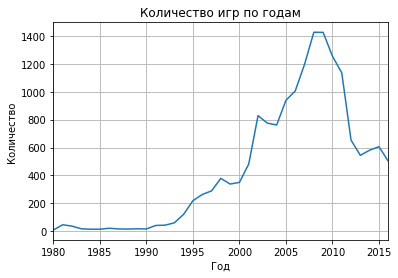

In [35]:
games_per_year.plot(grid=True, legend=False, title='Количество игр по годам').set(xlabel='Год', ylabel = 'Количество')
plt.show()

**Выводы**:
* видно, что до 1994 года игр производили мало. Связанно это скорее всего с тем, что в то время персональные компютеры не были распространены, а приставки еще не были выпущены
* до 2009 года был рост количества выпущенных игр, затем наступил спад из-за популяризации мобильного гейминга

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Соглашусь, мобильные игры могли забрать часть рынка на себя. 
</div>

<a name="exploratory_data_analysis.games_count"></a>
### Как менялись продажи по платформам

Найдем платформы с наибольшими суммарными продажами.  
Составим сводную таблицу, посчитав количество продаж игр по платформам.   

In [36]:
sales_per_platform = get_sales_by_platform(games_df)
sales_per_platform.head(5)

,total_sales_mm
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Построим диаграмму по суммарным продажам 

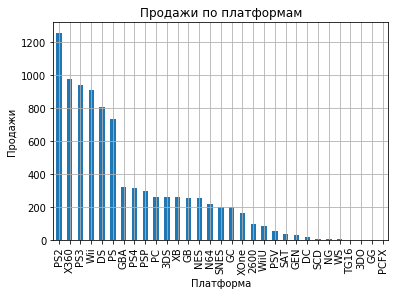

In [37]:
plot_sales_by_platform_hist(sales_per_platform)


Получим топ-5 платформ

In [38]:
top_platforms_df = sales_per_platform.head(5)
top_platforms = top_platforms_df.index.to_list()
print(top_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS']


Теперь выведем граф с зависимостью количества проданных игр по платформам от года

In [39]:
sales_per_platform_and_year = get_sales_by_platform_and_year(games_df)


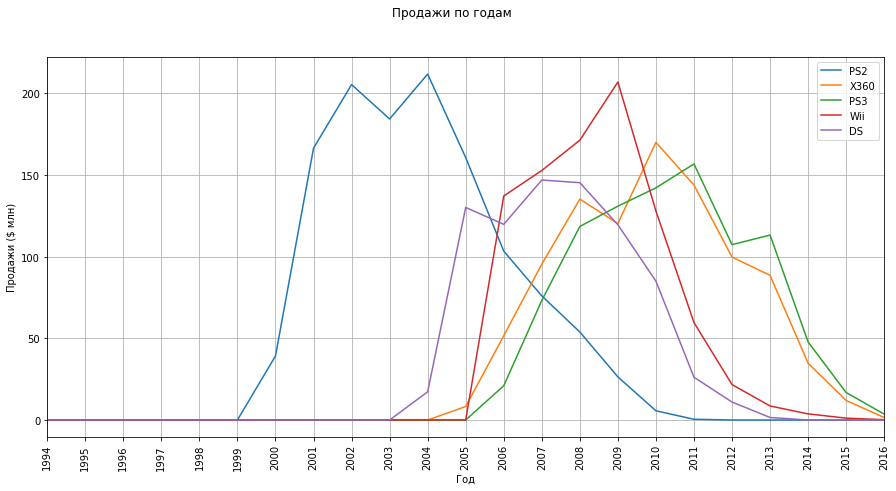

In [40]:
year_range = range(1994, 2017)

fig, ax = plt.subplots(figsize=(15, 7))

plt.suptitle('Продажи по годам')

for platform in top_platforms:
    sales_per_platform_and_year.loc[platform].reindex(year_range).fillna(0)\
        .plot(grid=True, ax=ax, xticks=year_range)

plt.xlabel('Год')
plt.ylabel('Продажи ($ млн)')
ax.legend(labels=top_platforms)
plt.xticks(rotation=90)
plt.show() 

**Вывод**: Срок жизни платформы примерно 10 лет. После этого выходит либо новая версия платформы, либо она просто устаревает. Мы можем выбрать актуальный период в 10 лет и смотреть на игры на современных платформах.

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

<div class="alert alert-info">
Посчитаем среднее значение продолжительности существования платформы

</div>

,min,max,diff
,year_of_release,year_of_release,
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28


count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: diff, dtype: float64
границы нормальных значений - ([0, 20])


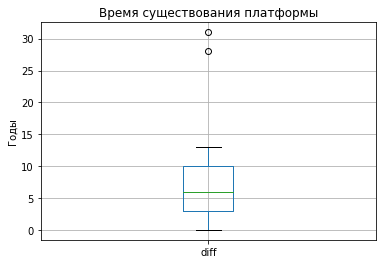

In [41]:
games_release_diff = games_df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
games_release_diff['diff'] = (games_release_diff['max'] - games_release_diff['min']).astype('int')
display(games_release_diff.head(5))

games_release_diff['diff'].plot(
        kind='box',
        grid=True, 
        title='Время существования платформы', 
    ).set(ylabel='Годы')
print(games_release_diff['diff'].describe())
print('границы нормальных значений - ({})'.format([round(x) for x in compute_normal_range(games_release_diff['diff'])]))
plt.show()

Видно, что есть выбросы в продолжительности жизни платформ, например PC который будет актуален всегда.  
Среднее значение равно 7.6 лет, но возьмем значение в 10, равное 75% перцентилю.  
Это значение совпадает с выводами, сделанными из графика.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Расчет произведен. Так мы можем подтвердить вывод, сделанный по графику.  

</div>

In [42]:
games_actual_df = games_df.query('2006 <= year_of_release <= 2016').copy()
games_actual_df.head(5)

,name,platform,year_of_release,genre,na_sales_mm,eu_sales_mm,jp_sales_mm,other_sales_mm,critic_score,user_score,rating,rating_category,total_sales_mm
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,0.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,0.0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,0.0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,0.0,28.91


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Актуальный период назван. Так в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

<a name="exploratory_data_analysis.games_count"></a>
### Какие платформы лидируют по продажам, растут или падают

Посмотрим распределение продаж по платформам за актуальный период

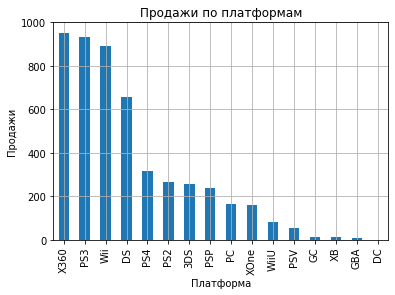

In [43]:
sales_per_platform_actual = get_sales_by_platform(games_actual_df)
plot_sales_by_platform_hist(sales_per_platform_actual)

Сохраним информацию о продажам по платформам по годам для дальнейшего анализа

In [44]:
sales_per_platform_and_year_actual = get_sales_by_platform_and_year(games_actual_df)
sales_per_platform_and_year_actual.head(5)

,,total_sales_mm
platform,year_of_release,
X360,2006,51.62
GC,2006,11.26
Wii,2006,137.15
PC,2006,2.85
PSP,2006,55.32


Теперь посмотрим, растут ли на них продажи или падают 

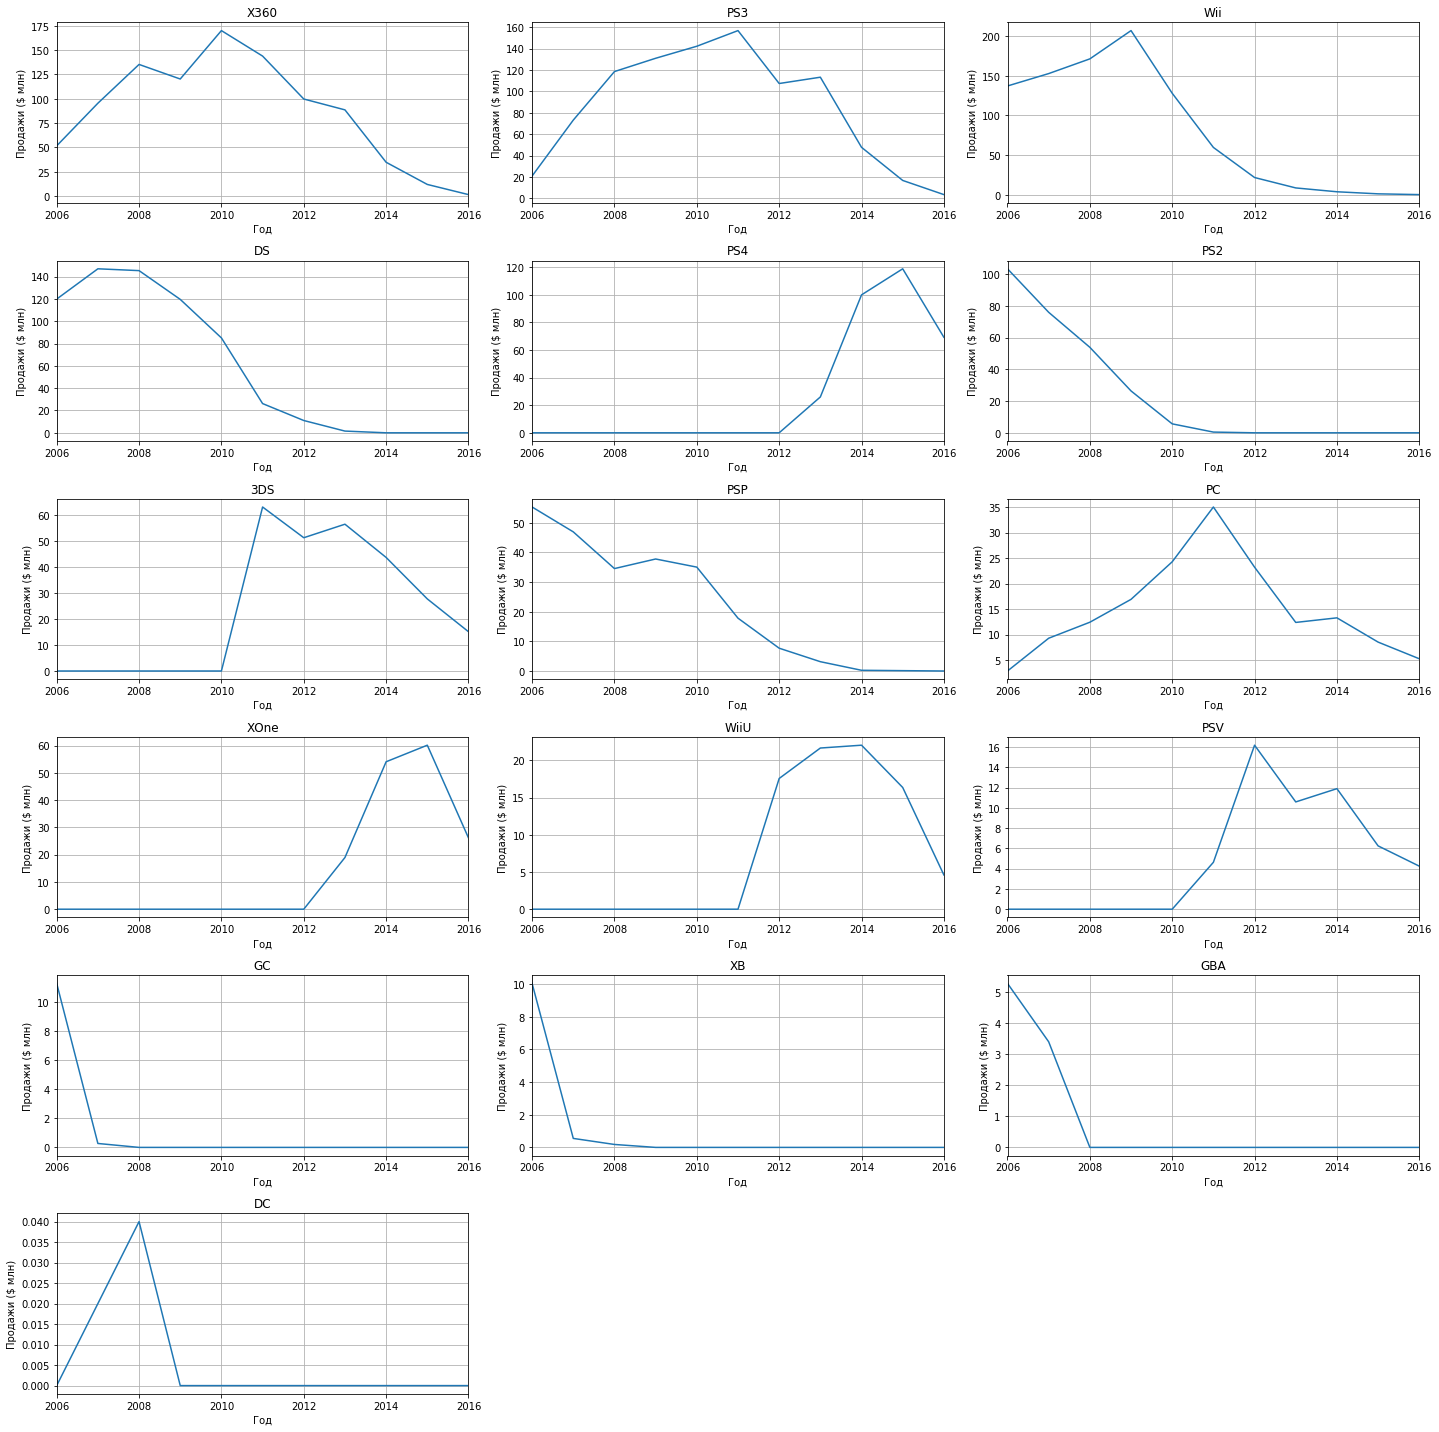

In [45]:
platforms = sales_per_platform_actual.index.to_list()
year_range = range(2006, 2017)

cols = 3
rows = int(np.ceil(len(platforms) / cols))

fig, ax = plt.subplots(rows, cols)

for idx, platform in enumerate(platforms):
    sales_per_platform_and_year_actual.loc[platform].reindex(year_range).fillna(0)\
        .plot(grid=True, ax=ax[idx // cols, idx % cols], title=platform, figsize=(20,20), legend=False)\
        .set(xlabel='Год', ylabel = 'Продажи ($ млн)')

for idx in range(idx + 1, cols * rows):
    fig.delaxes(ax[idx // cols, idx %cols])

plt.tight_layout()
plt.show()

**Выводы**:
* продажа на большинстве платформ идет на убыль 
* перспективные платформы - это консоли нового поколения: PS4 и XOne
* также обратим внимание на платформу PC, как не устаревающую 
* из портативных платформ обратим внимание на 3DS, как на самую прибыльную 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. Круто, что ты автоматизировал процесс построения графиков. Однако последние 2 не получились. Попробуй понять причину данного явления. 

</div>

<div class="alert alert-info">
Удалил неиспользованные графики

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Значений по таким платформам было мало в данном периоде, поэтому и точек не хватало. 

</div>

<a name="exploratory_data_analysis.total_sales_by_platform"></a>
### График по глобальным продажам игр в разбивке по платформам

Построим диаграмму размаха по платформам PS4, XOne, PC, 3DS

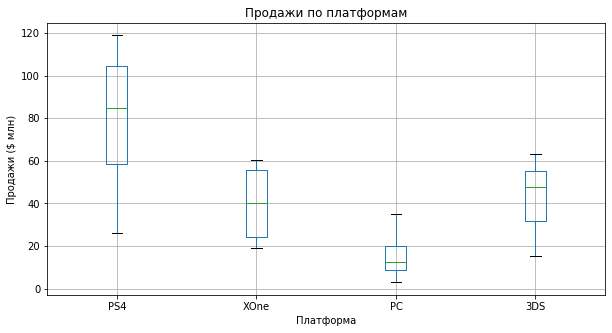

Продажи по PS4:
cреднее - 78.54
медиана - 84.62
стандартное отклонение - 40.57
дисперсия - 1645.76
границы нормальных значений - ([26, 119])

Продажи по XOne:
cреднее - 39.83
медиана - 40.11
стандартное отклонение - 20.31
дисперсия - 412.66
границы нормальных значений - ([19, 60])

Продажи по PC:
cреднее - 14.86
медиана - 12.42
стандартное отклонение - 9.45
дисперсия - 89.22
границы нормальных значений - ([3, 35])

Продажи по 3DS:
cреднее - 42.97
медиана - 47.56
стандартное отклонение - 18.28
дисперсия - 334.09
границы нормальных значений - ([15, 63])



In [46]:
platforms = ['PS4', 'XOne', 'PC', '3DS']

fig, ax = plt.subplots()

for idx, platform in enumerate(platforms):
    sales_per_platform_and_year_actual.loc[platform]['total_sales_mm'].plot(
        kind='box',
        positions=[idx],
        grid=True, 
        title='Продажи по платформам', 
        figsize=(10,5),
    ).set(xlabel='Платформа', ylabel='Продажи ($ млн)')
ax.set_xticklabels(platforms)
    
plt.show()
    
for platform in platforms:
    series = sales_per_platform_and_year_actual.loc[platform]['total_sales_mm']
    
    print('Продажи по {}:'.format(platform))
    print('cреднее - {:.2f}'.format(series.mean()))
    print('медиана - {:.2f}'.format(series.median()))
    print('стандартное отклонение - {:.2f}'.format(series.std()))
    print('дисперсия - {:.2f}'.format(np.var(series, ddof=1)))
    print('границы нормальных значений - ({})'.format([round(x) for x in compute_normal_range(series)]))
    print()

<div class="alert alert-info">
Посчитаем количество эксклюзивов на платформах
</div>

In [47]:
games_popular_platforms = games_actual_df.query('platform in @platforms')
games_popular_platforms_by_names = games_popular_platforms\
    .pivot_table(index='name', values='platform', aggfunc='count')

In [48]:
exclusive_games = games_popular_platforms_by_names.query('platform == 1')
games_popular_platforms.query('name in @exclusive_games.index')['platform'].value_counts()


PC      641
3DS     477
PS4     161
XOne     28
Name: platform, dtype: int64

Найдем кроссплатформенные игры и посмотрим, сколько каждая из них приносит по каждой платформе

In [49]:
cross_platform_games = games_popular_platforms_by_names.query('platform == 4')
print(cross_platform_games.shape[0])

9


<div class="alert alert-info">
Их всего 9, посмотрим на доходность по ним
</div>

In [50]:
games_popular_platforms\
    .query('name in @cross_platform_games.index')\
    .pivot_table(index=['name', 'platform'], values='total_sales_mm')\
    .head(9 * 4)

total_sales_mm
name                            platform                
FIFA 14                         3DS                 0.23
                                PC                  0.40
                                PS4                 3.01
                                XOne                1.16
FIFA 15                         3DS                 0.46
                                PC                  0.29
                                PS4                 6.08
                                XOne                2.18
LEGO Jurassic World             3DS                 0.62
                                PC                  0.04
                                PS4                 0.90
                                XOne                0.66
LEGO Marvel Super Heroes        3DS                 0.89
                                PC                  0.17
                                PS4                 1.62
                                XOne                1.05
LEGO The Hobbit                 3DS                 0.24
                                PC                  0.05
                                PS4                 0.60
                                XOne                0.27
Lego Batman 3: Beyond Gotham    3DS                 0.45
                                PC                  0.06
                                PS4                 0.92
                                XOne                0.44
Terraria                        3DS                 0.09
                                PC                  0.14
                                PS4                 0.07
                                XOne                0.04
The Amazing Spider-Man 2 (2014) 3DS                 0.07
                                PC                  0.01
                                PS4                 0.56
                                XOne                0.22
The LEGO Movie Videogame        3DS                 0.69
                                PC                  0.06
                                PS4                 0.67
                                XOne                0.53

Посчитаем топ-10 самых прибыльных игр

In [51]:
games_popular_platforms.sort_values('total_sales_mm', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales_mm,eu_sales_mm,jp_sales_mm,other_sales_mm,critic_score,user_score,rating,rating_category,total_sales_mm
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.2,E,0.0,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,3.0,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,NaN,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90,8.4,E,0.0,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,0.0,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88,8.7,E,0.0,9.17
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,0.0,8.58
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86,7.6,T,2.0,8.01


Посчитаем количество игр по платформам

In [52]:
games_popular_platforms.pivot_table(index='platform', values='name', aggfunc='count')

,name
platform,
3DS,512
PC,776
PS4,392
XOne,247


**Вывод**: Самая прибыльная платформа - PS4, затем идут 3DS и XOne и PC. Происходит это потому, что на PS4 больше эксклюзивов, чем на XOne, на PC распространено пиратство. 3DS приносит меньше всего денег в случае кросс-платформенных игр, но при этом 6 из топ-10 игр вышли на нем, что говорит о его нишевости.

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. Также попробуй построить графики на одном рисунке. Так мы сможем качественее сравнить показатели между собой. 

</div>

<div class="alert alert-info">
Построил графики на одном рисунке и дополнил вывод

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Именно в поиске скрытых закономерностей и состоит работа аналитика. Мтарайся всегда понять причину появления того или иного результата. 

</div>

<a name="exploratory_data_analysis.scores"></a>
### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [53]:
def plot_total_sales_by_user_score(df):
    df.plot(x='user_score', y='total_sales_mm', kind='scatter', grid=True).set(ylabel = 'Продажи ($ млн)', xlabel='Оценка', title='Оценка пользователей')
    df.plot(x='critic_score', y='total_sales_mm', kind='scatter', grid=True).set(ylabel = 'Продажи ($ млн)', xlabel='Оценка', title='Оценка критиков')
    plt.show()
    
def compute_corr(df):
    features = ['total_sales_mm', 'user_score', 'critic_score']
    # Уберем строки с пропусками в оценках
    df_with_ratings = df.query('user_score.notna() and critic_score.notna()')
    # Посичтаем корреляции
    display(df_with_ratings[features].corr())
    # Выведем диаграммы рассеяния
    plot_total_sales_by_user_score(df_with_ratings)

Выведем корреляции для консоли PS4 

,total_sales_mm,user_score,critic_score
total_sales_mm,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


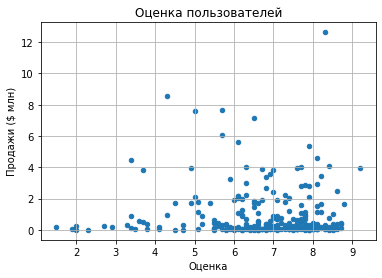

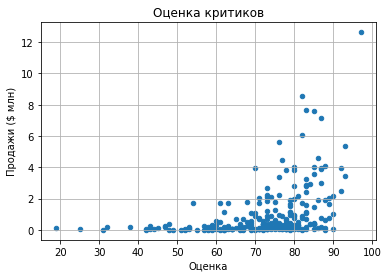

In [54]:
compute_corr(games_actual_df[games_actual_df['platform'] == 'PS4'])

**Выводы**: 
* Отзывы пользователей не связаны с продажами 
* Отзывы критиков связаны с продажами, но не очень сильно 
* Есть средняя взаимосвязь между отзывами критиков и пользователей

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

По каждому графику в работе проверь названия рисунков.    

</div>

<div class="alert alert-info">
Добавил title 

</div>

<a name="exploratory_data_analysis.compare_scores"></a>
### Сравнение выводов с продажами игр на других платформах

<div class="alert alert-info">
Рассмотрим корреляции по другим популярным платформам: XOne, PC, 3DS
</div>

Для XOne

,total_sales_mm,user_score,critic_score
total_sales_mm,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


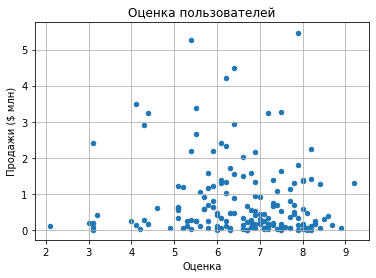

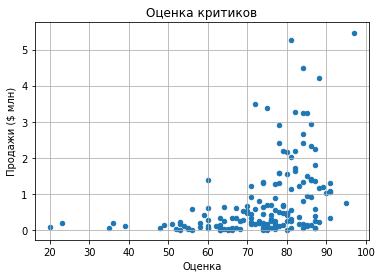

In [55]:
compute_corr(games_actual_df[games_actual_df['platform'] == 'XOne'])

**Выводы**:
* Характер корреляций очень похож на PS4
* Отзывы критиков тожк связаны с продажам
* Отзывы пользователей не влияют на продажи игры

Для PC

,total_sales_mm,user_score,critic_score
total_sales_mm,1.000000,-0.019742,0.287880
user_score,-0.019742,1.000000,0.521036
critic_score,0.287880,0.521036,1.000000


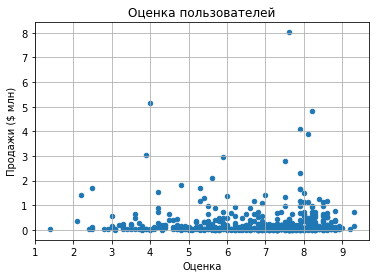

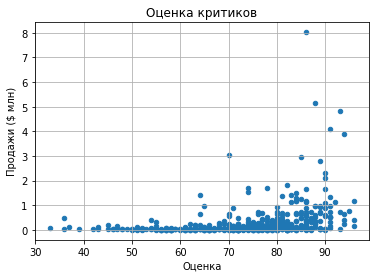

In [56]:
compute_corr(games_actual_df[games_actual_df['platform'] == 'PC'])

Посчитаем среднюю оценку по платформам PC и PS4 и количество игр

In [57]:
display(games_actual_df\
    .query('platform in ["PC", "PS4"] and user_score.notna() and critic_score.notna()')\
    .pivot_table(index='platform', values='critic_score'))

display(games_actual_df\
    .query('platform in ["PC", "PS4"]')\
    .pivot_table(index='platform', values='name', aggfunc='count'))

,critic_score
platform,
PC,74.643739
PS4,72.132530


,name
platform,
PC,776
PS4,392


**Выводы**:
* Связь с отзывам критиков еще меньше, чем на консолях.  
Скорее всего это связан с большим количеством неоцененных инди игр

Для 3DS

,total_sales_mm,user_score,critic_score
total_sales_mm,1.000000,0.232089,0.338904
user_score,0.232089,1.000000,0.745222
critic_score,0.338904,0.745222,1.000000


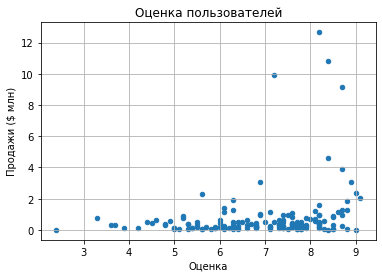

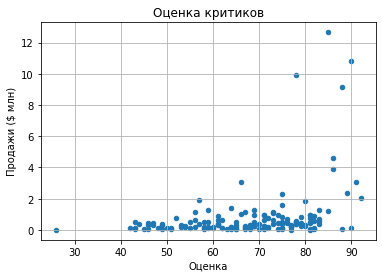

In [58]:
compute_corr(games_actual_df[games_actual_df['platform'] == '3DS'])

**Выводы**:
* Связь с отзывами критиков здесь выше, чем у PC, но ниже, чем на консолях
* 3DS - единственная плоатформа, где есть хоть какая-то связь с отзывами пользователей, небольшая.  
Происходит это скорее всего из-за нишевости платформы, т.е пользователи лучше знакомы с ассортиментом предлагаемых игр
* Связь между оценками критиков и пользователей здесь больше, чем на всех остальных платформах 

Построим корреляции для всех платформ

,total_sales_mm,user_score,critic_score
total_sales_mm,1.000000,0.082431,0.229250
user_score,0.082431,1.000000,0.570892
critic_score,0.229250,0.570892,1.000000


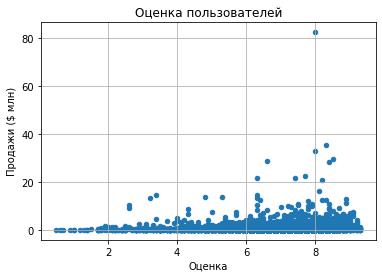

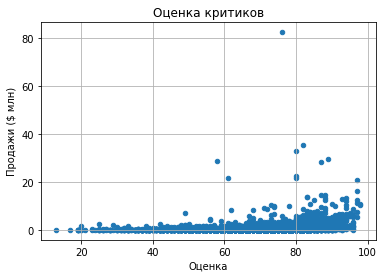

In [59]:
compute_corr(games_actual_df)

**Выводы**: 
* Отзывы пользователей не связаны с продажами
* Отзывы критиков почти не связаны с продажами 
* Есть взаимосвязь между отзывами критиков и пользователей 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Результат получен. Подумай, чем он вызван. Почему мы получаем такие значения?

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Рассматривать стоит популярные платформы по-отдельности. Именно такой анализ поможет нам в построении прогноза на 2017 год. 

</div>

<div class="alert alert-info">
Добавил анализ и выводы по другим популярным платформам

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Молодец, что автоматизировал процесс построения графиков. Анализ других платформ выполнен. Так мы можем подтвердить выводы, сделанные ранее. 

</div>

<a name="exploratory_data_analysis.games_by_genre"></a>
### Общее распределение игр по жанрам

Построим сводную таблицу по жанрам

In [60]:
games_actual_genre_df = games_actual_df.pivot_table(index='genre', values='total_sales_mm', aggfunc='sum').sort_values('total_sales_mm', ascending=False)
games_actual_genre_df.head(5)

,total_sales_mm
genre,
Action,1116.65
Sports,793.85
Shooter,717.04
Misc,554.86
Role-Playing,522.40


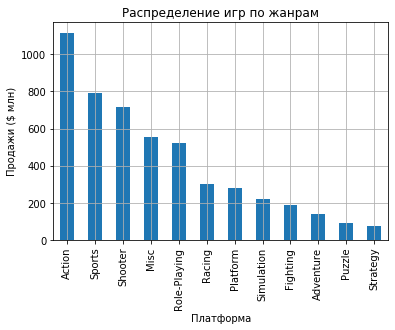

In [61]:
games_actual_genre_df.plot(kind='bar', grid=True, legend=False, title='Распределение игр по жанрам').set(xlabel='Платформа', ylabel='Продажи ($ млн)')
plt.show()

**Вывод**:
* Самые популярные жанры: action, sports, shooter
* Непопулярные: puzzle, strategy

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

<a name="region_users"></a>
## Шаг 4. Портрет пользователя каждого региона

In [62]:
from collections import namedtuple

Region = namedtuple('Region', ['name', 'metrics'])

class RegionAnalyser(object): 
    REGIONS = (
        Region('NA', 'na_sales_mm'), 
        Region('EU', 'eu_sales_mm'), 
        Region('JP', 'jp_sales_mm'),
    )
    
    def __init__(self, df):
        self._df = df
        
    def top5(self, column):
        fig, axes = plt.subplots(nrows=2, ncols=3)

        for idx, region in enumerate(self.REGIONS):
            top5_values = self._df.pivot_table(index=column, values=region.metrics, aggfunc='sum')\
                .sort_values(region.metrics, ascending=False).head(5)
            top5_values.plot(
                kind='pie', 
                y=region.metrics, 
                ax=axes[0, idx], 
                figsize=(20, 10), 
                legend=False, 
                title=region.name, 
                autopct='%1.0f%%'
            ).set(ylabel='Продажи')
            top5_values.plot(
                kind='bar', 
                ax=axes[1, idx], 
                figsize=(20, 10), 
                legend=False, 
                title=region.name, 
            ).set(xlabel='Платформа', ylabel='Продажи ($ млн)')
        plt.show()

<a name="region_users.platform"></a>
### Самые популярные платформы

Выведем график типа `pie` с популярностью платформ по 3 регионам

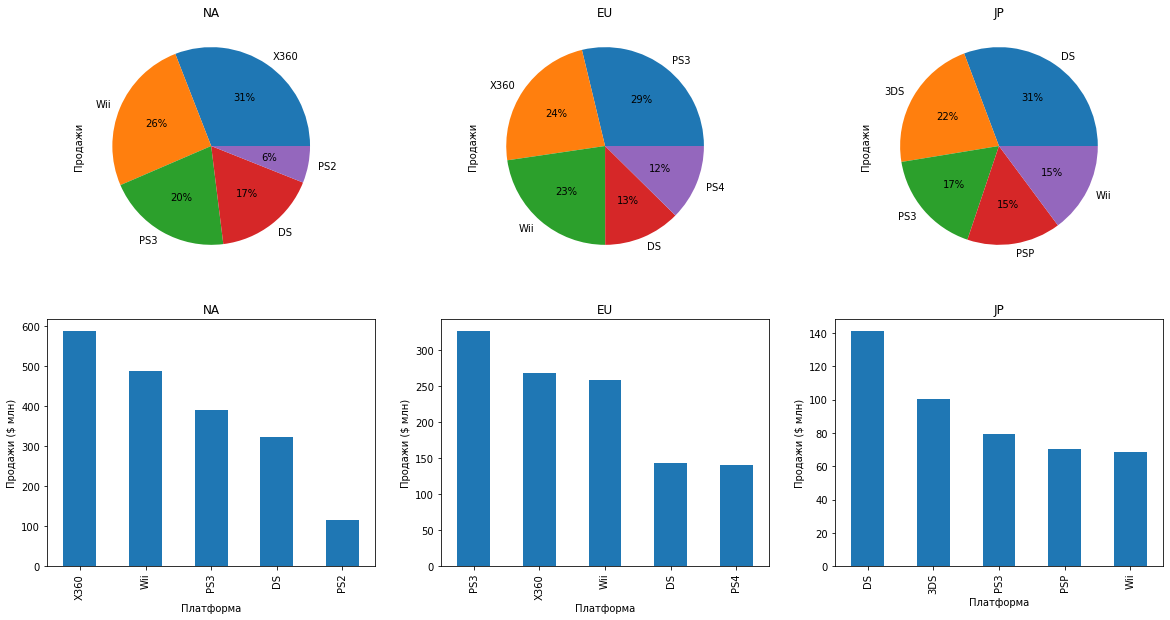

In [63]:
RegionAnalyser(games_actual_df).top5('platform')

**Выводы**:
* В США самая популярная консоль - Xbox 360, разработанная американской корпорацией Microsoft, PS3 только третья
* В Европе самая популярная консоль - PS3, за ней идут Xbox 360 и Wii
* В Японии пользователи предпочитвают портативные консоли, самые популярные - DS и 3DS. На 3 месте уже идет PS3

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм.
    
</div>

<div class="alert alert-info">
    
Поменял отображение на столбчатые диаграммы 
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Согласись, так графики становятся куда более информативны. 

</div>

<a name="region_users.genre"></a>
### Самые популярные жанры

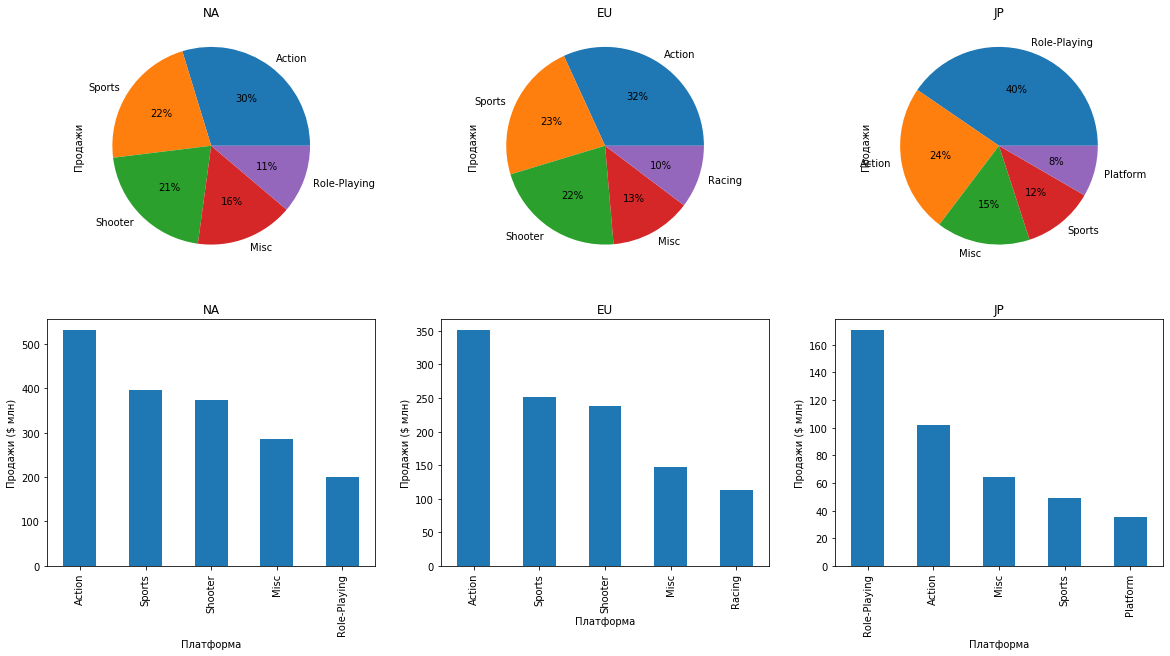

In [64]:
RegionAnalyser(games_actual_df).top5('genre')

**Выводы**:
* В США самые популярные жанры это экшены, спортивные игры и шутеры
* В Европе ситуация та же самая, что в США
* В Японии ситуация кардинально другая, там самые попрулярные игры - ролевые, после этого уже идут экшены, а шутеров в топе вообще нет

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
 
Из-за чего японский рынок игр так сильно отличается от других? 

</div>

<div class="alert alert-info">
Из-за распространенности игр жанра JRPG 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

А жанр почему тогда там распространен?) Такое объяснение не совсем полностью объясняет полученные результаты.

</div>

<a name="region_users.rating"></a>
### Влияние рейтинга ESRB

In [65]:
print_nan_count(games_actual_df, 'rating')

Количество пропусков в столбце rating: 3487


<div class="alert alert-info">
Заменим пропуски на рейтинг RP

</div>

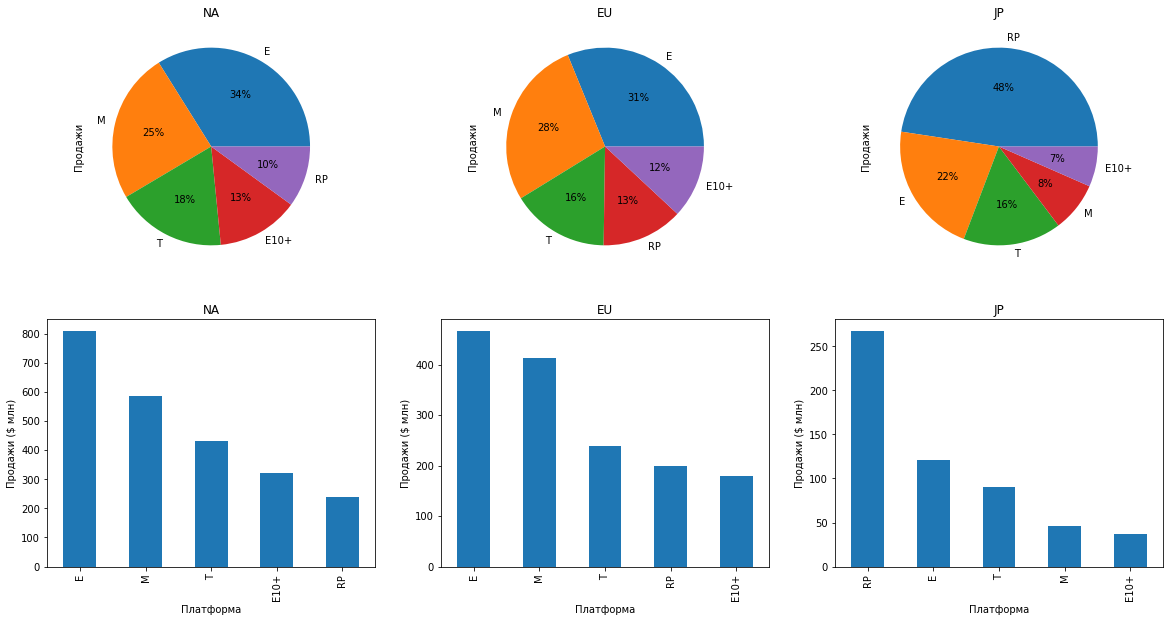

In [66]:
games_actual_df['rating'] = games_actual_df['rating'].replace(np.nan, 'RP')
RegionAnalyser(games_actual_df).top5('rating')

**Выводы**:
* В США всего на взрослую аудиторию приходится 27% игр от общего количества оцененных игр, игр без рейтинга 10%
* В Европе на взрослую аудиторию приходится больше продаж - 31%, игр без рейтинга примерно как в США - 13%
* Япония опять сильно отличается, тут на взрослую аудиторию приходится всего 13% продаж, а на игры без рейтинга целых 48%. Связано это скорее всего с тем, что ESRB - [американская](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) организация и она не ставит рейтинги играм, выходящим эксклюзивно на рынке Японии.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.

</div>

<div class="alert alert-info">
Немного избавился от пропусков на этапе <a href="#data_preprocessing.missing.rating">обработки пропусков</a>
<br>
Можешь подсказать, что ты имел ввиду? 
<br>
Потому что я не понимаю, как можно группировать значения без рейтинга. 
<br>
У нас их 38%, кажется это не так много. 
</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера 2</h2>

Но и не мало. Отсутствие рейтинга можно отметить в данных, например, значением RP, которое уже есть у нас и значит дословно, что рейтинг ожидается. Так вот игры без рейтинга также стоит включить в данный анализ. Без них мы получаем неполные результаты. 

</div>

<div class="alert alert-info">
Понял, спасибо)
<br>
Поменял пропуски на RP и дополнил вывод
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Круто, мы нашли особенность японского рынка игр - большая локальность изданий. Также это мы можем объяснить культурными особенностями данного региона. Остальной мир не понимает такие игры)

</div>

<a name="hypotheses"></a>
## Шаг 5. Проверка гипотез

In [67]:
def print_stat(df, column):
    print('Статистика для столбца {}:'.format(column))
    print(df[column].agg(['mean','median','var','std']))

<a name="hypotheses.platform"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сохраним данные по платформам XOne и PC для анализа

In [68]:
games_actual_xone_df = games_actual_df.query('platform == "XOne" and user_score.notna()')
games_actual_pc_df = games_actual_df.query('platform == "PC" and user_score.notna()')

Посмотрим статистические данные по этим датасетам

In [69]:
print_stat(games_actual_xone_df, 'user_score')
print_stat(games_actual_pc_df, 'user_score')

Статистика для столбца user_score:
mean      6.521429
median    6.800000
var       1.906997
std       1.380941
Name: user_score, dtype: float64
Статистика для столбца user_score:
mean      6.830081
median    7.300000
var       2.315234
std       1.521589
Name: user_score, dtype: float64


Дисперсии не равны, выставим `equal_var` раным False

Нулевая гипотеза H<sub>0</sub>: "cредние пользовательские рейтинги платформ Xbox One и PC **не различаются**".  
Из нее следует альтернативная гипотеза H<sub>1</sub>: "cредние пользовательские рейтинги платформ Xbox One и PC **различаются**".  
Пороговое значение `alpha` (критический уровень статистической значимости) зададим равным `5%`.

In [70]:
alpha = .05

results = st.ttest_ind(
    games_actual_xone_df['user_score'], 
    games_actual_pc_df['user_score'],
    equal_var = False,
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01014021353497224
Отвергаем нулевую гипотезу


**Вывод**: Наша H<sub>0</sub> гипотеза не подтвердилась, а значит средние пользовательские рейтинги платформ Xbox One и PC **различаются**

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Гипотезы сформулированы и проверены верно.

</div>

<a name="hypotheses.city"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Сохраним данные по жанрам Action и Sports для анализа

In [71]:
games_actual_action_df = games_actual_df.query('genre == "Action" and user_score.notna()')
games_actual_sports_df = games_actual_df.query('genre == "Sports" and user_score.notna()')

Посмотрим статистические данные по этим датасетам

In [72]:
print_stat(games_actual_action_df, 'user_score')
print_stat(games_actual_sports_df, 'user_score')

Статистика для столбца user_score:
mean      6.878625
median    7.200000
var       1.859581
std       1.363664
Name: user_score, dtype: float64
Статистика для столбца user_score:
mean      6.416420
median    6.800000
var       2.732308
std       1.652969
Name: user_score, dtype: float64


Дисперсии не равны, выставим `equal_var` раным False

Нулевая гипотеза H<sub>0</sub>: "cредние пользовательские рейтинги жанров Action и Sports **не различаются**".  
Из нее следует альтернативная гипотеза H<sub>1</sub>: "cредние пользовательские рейтинги жанров Action и Sports **различаются**".  
Пороговое значение `alpha` (критический уровень статистической значимости) зададим равным `5%`.

In [73]:
alpha = .05

results = st.ttest_ind(
    games_actual_action_df['user_score'], 
    games_actual_sports_df['user_score'],
    equal_var = False,
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.319061853268226e-10
Отвергаем нулевую гипотезу


**Вывод**: Наша H<sub>0</sub> гипотеза не подтвердилась, а значит cредние пользовательские рейтинги жанров Action и Sports **различаются**. 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Проверка второй гипотезы также выполнена верно. 

</div>

<a name="general_conclusion"></a>

## Шаг 6. Общий вывод

Была проведена работа по анализу данных о продажах компьютерных игр в интренет-магазине «Стримчик»

Сначала были заменены названия столбцов, изменены типы данных и в таблицу добавлены данные о суммарных продажах. 
После этого был произведен анализ следующих показателей:
* изменение количества произведенных игр с течением времени
* продажи на разных платформах 
* найдены и проанализированы лидеры по продажам среди платформ 
* изучены корреляции продаж от отценок пользователей и критиков на самой популярной платформе - ps4 
* произведен анализ корреляций для других платформ и произведено сравнение с результатом предыдущего шага
* вычисле топ жанров по продажам 

Затем был произведен анализ пользовательских предпочтений в 3-ех регионах: США, Европа, Япония. Была исследована влияние платформ, жанров и рейтина ESRB на продажи в регионе. 

После этого были проверен 2 гипотезы: 
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые - эта гипотеза была опровергнута.
* Средние пользовательские рейтинги жанров Action и Sports разные - эта гипотеза была подтверждена.

Результаты:
* самые урожайные года по количеству игр - 2008 и 2009, после этого наблюдается спад произведенных игр из-за распространения мобильного гейминга
* самая прибыльная платформа за все время - PS2
* среднее время жизни платформы - 10 лет 
* перспективные платформы, которые приносят деньги -  PS4, XOne, PC, 3DS
* ретинги критиков немного влияют на продажи и связаны с рейтингом игроков. С другой стороны рейтинги игроков не влияют на продажн
* самые популярные жанры: action, sports, shooter, непопулярные: puzzle, strategy
* в США самая популярная консоль - Xbox 360, в Европе - PS3, а в Японии пользователи предпочитвают портативные консоли, самые популярные - DS и 3DS
* в Европе и США самые популярные жанры это экшены, спортивные игры и шутеры, в Японии - ролевые игры 
* доля проданных игр для взрослых в США - 27%, в Европе - 31%, а в Японии всего 13%
* гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые была опровергнута
* гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные была подтверждена

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. Хорошо бы привести и рекомендации для компании по дальнйешим действиям. Это именно то, что от нас и ждут.  

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ты исправил многие помарки, молодец. Осталось только рассмотреть игры без рейтинга при построении портрета пользователей каждого из регионов. Как сделаешь это, присылай работу снова :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Все помарки исправлены, и теперь работа выполнена хорошо. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Я рад, что ты справился со всеми трудностями. Успехов в дальнейшем пути :)

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты выполнил все пункты работы, молодец! Критических замечаний немного. Однако их важно устранить. Также в работе есть некоторое число желтых комментариев, которые стоит исправить. Думаю, ты справишься с этим быстро. Жду твою работу :)

</div>